In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | vila
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | jiazi
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | kargasok
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | luchow
Processing Record 21 of Set 1 | madan
Processing Record 22 of Set 1 | hajnowka
Processing Recor

Processing Record 38 of Set 4 | vega de alatorre
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | utiroa
City not found. Skipping...
Processing Record 42 of Set 4 | maricao
Processing Record 43 of Set 4 | myitkyina
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | katangli
Processing Record 47 of Set 4 | halden
Processing Record 48 of Set 4 | whitecourt
Processing Record 49 of Set 4 | tezu
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | doha
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | hambantota
Processing Record 4 of Set 5 | nanning
Processing Record 5 of Set 5 | taoudenni
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | collie
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | bara
Processing Record 10 of Set 5 | emerald
Processing Record 11 

Processing Record 25 of Set 8 | shelburne
Processing Record 26 of Set 8 | bassila
Processing Record 27 of Set 8 | tisovec
Processing Record 28 of Set 8 | troy
Processing Record 29 of Set 8 | kudahuvadhoo
Processing Record 30 of Set 8 | russell
Processing Record 31 of Set 8 | betsiamites
Processing Record 32 of Set 8 | alyangula
Processing Record 33 of Set 8 | chicama
Processing Record 34 of Set 8 | qandala
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | babu
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | keti bandar
Processing Record 39 of Set 8 | faya
Processing Record 40 of Set 8 | tumarbong
Processing Record 41 of Set 8 | port augusta
Processing Record 42 of Set 8 | axim
Processing Record 43 of Set 8 | owatonna
Processing Record 44 of Set 8 | kitimat
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | tornio
Processing Record 47 of Set 8 | joshimath
Processing Record 

Processing Record 13 of Set 12 | broome
Processing Record 14 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 16 of Set 12 | kuopio
Processing Record 17 of Set 12 | iqaluit
Processing Record 18 of Set 12 | kungurtug
Processing Record 19 of Set 12 | perevolotskiy
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | pasni
Processing Record 22 of Set 12 | huadian
Processing Record 23 of Set 12 | honavar
Processing Record 24 of Set 12 | homer
Processing Record 25 of Set 12 | diffa
Processing Record 26 of Set 12 | port-gentil
Processing Record 27 of Set 12 | orange
Processing Record 28 of Set 12 | pemangkat
Processing Record 29 of Set 12 | miquelon
Processing Record 30 of Set 12 | san luis
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | chardara
Processing Record 33 of Set 12 | barinas
Processing Record 34 of Set 12 | emborion
Processing Record 35 of Set

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,64.42,92,0,10.00,AR,2022-04-20 22:44:24
1,Vila,42.0304,-8.1588,38.28,77,17,3.56,PT,2022-04-20 22:49:16
2,Ostrovnoy,68.0531,39.5131,33.12,94,100,9.57,RU,2022-04-20 22:49:17
3,Thompson,55.7435,-97.8558,33.96,51,75,13.80,CA,2022-04-20 22:49:17
4,Atuona,-9.8000,-139.0333,79.57,74,43,17.78,PF,2022-04-20 22:49:17
5,Hobart,-42.8794,147.3294,51.66,72,75,8.05,AU,2022-04-20 22:45:02
6,Ribeira Grande,38.5167,-28.7000,59.70,67,8,4.16,PT,2022-04-20 22:49:18
7,Cape Town,-33.9258,18.4232,65.26,92,100,7.00,ZA,2022-04-20 22:49:19
8,Bluff,-46.6000,168.3333,59.81,93,91,15.82,NZ,2022-04-20 22:48:08
9,Cabo San Lucas,22.8909,-109.9124,77.05,69,0,5.99,MX,2022-04-20 22:49:19


In [13]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-04-20 22:44:24,-38.0023,-57.5575,64.42,92,0,10.00
1,Vila,PT,2022-04-20 22:49:16,42.0304,-8.1588,38.28,77,17,3.56
2,Ostrovnoy,RU,2022-04-20 22:49:17,68.0531,39.5131,33.12,94,100,9.57
3,Thompson,CA,2022-04-20 22:49:17,55.7435,-97.8558,33.96,51,75,13.80
4,Atuona,PF,2022-04-20 22:49:17,-9.8000,-139.0333,79.57,74,43,17.78
...,...,...,...,...,...,...,...,...,...
537,Ruteng,ID,2022-04-20 23:05:11,-8.6136,120.4721,64.11,87,84,1.88
538,Costa Rica,BR,2022-04-20 23:05:12,-23.4167,-54.6500,72.16,78,31,6.46
539,Akureyri,IS,2022-04-20 23:05:12,65.6835,-18.0878,42.35,88,97,7.90
540,Pauini,BR,2022-04-20 23:05:12,-7.7136,-66.9764,73.54,93,89,2.28


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today= time.strftime("%x")
today

'04/20/22'

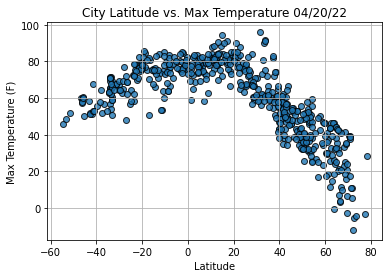

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

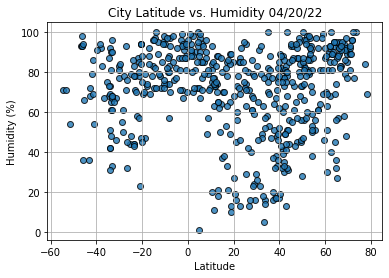

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

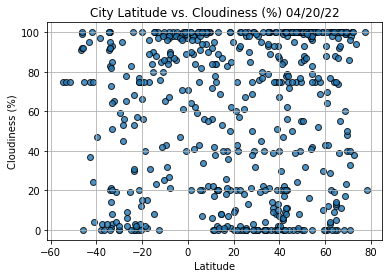

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()